In [1]:
%run -n main.py
%matplotlib inline

In [2]:
%run -n main.py
# history = list(load_lastfm_tracks())
# dump_lastfm_tracks(history)
history = load_lastfm_tracks()

In [3]:
%run -n main.py
# serps = load_echonest_serps(tracks)
# dump_echonest_serps(serps)
serps = load_echonest_serps()

In [4]:
%run -n main.py
tracks = list(filter_tracks_by_listened(join_lastfm_echonest(history, serps)))

Достаточно стабильное число прослушиваний за 5 лет. С 2015 как будто упало

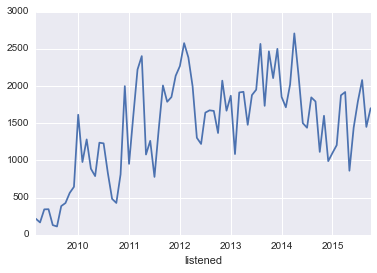

In [253]:
table = pd.DataFrame([_.listened for _ in tracks], columns=['listened'])
table = table.groupby('listened').size()
table = table.resample('M', how='sum')
table.plot()

Ну да, прикольно понастальгировать. Но моменты когда мне понравилась эта песня не возникают

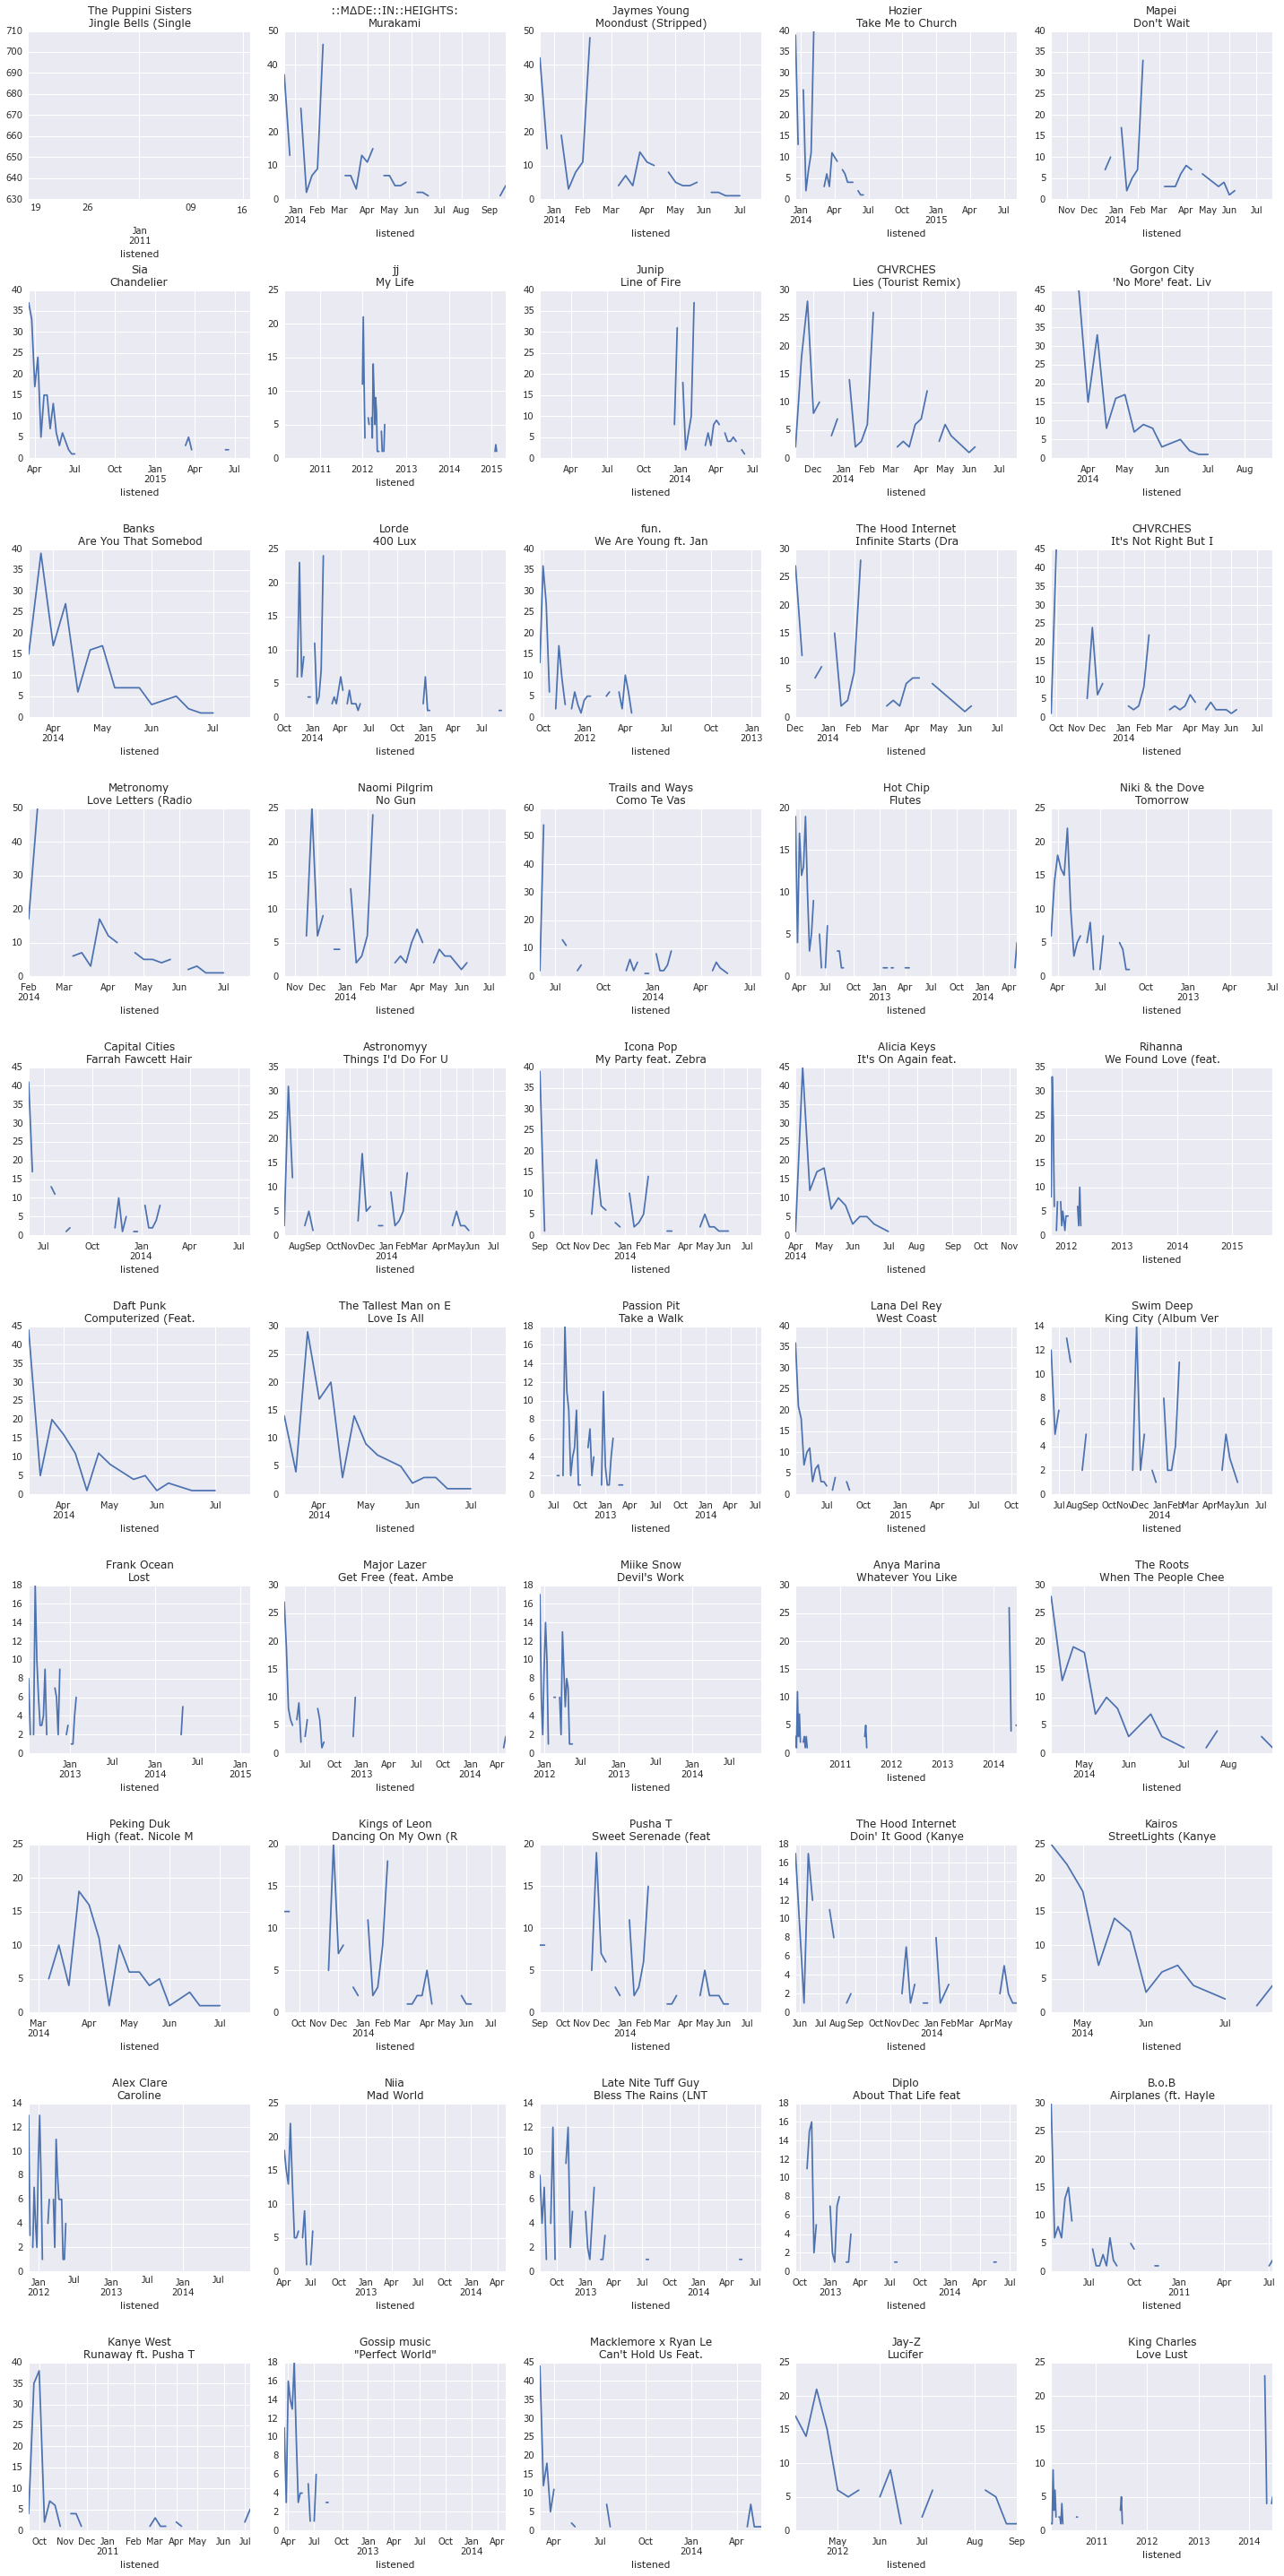

In [292]:
%run -n main.py
table = pd.DataFrame(
    [(_.listened, _.artist.name, _.name) for _ in tracks],
    columns=['listened', 'artist', 'track']
)
top = table.groupby(['artist', 'track']).size()
top = top.sort_values(ascending=False, inplace=False)
fig, axis = plt.subplots(10, 5)
for (artist, track), ax in zip(top.index, axis.flatten()):
    series = table[(table.artist == artist) & (table.track == track)]
    series = series.groupby('listened').size()
    series = series.resample('W', how='sum')
    title = u'{artist}\n{track}'.format(
        artist=artist[:20],
        track=track[:20]
    )
    series.plot(ax=ax, figsize=(20, 40), title=title)
fig.tight_layout() 

In [307]:
%run -n main.py
day_tracks = defaultdict(list)
for track in tracks:
    listened = track.listened
    day = datetime(listened.year, listened.month, listened.day)
    day_tracks[day].append((track.artist.name, track.name))

In [320]:
days = sorted(day_tracks)
data = []
for index in xrange(len(days)):
    day = days[index]
    index_ = index - 1
    day_ = days[index_]
    listened = set()
    while (day - day_).days < 30 and index_ >= 0:
        listened.update(day_tracks[day_])
        index_ -= 1
        day_ = days[index_]
    total = day_tracks[day]
    new = set(total) - listened
    data.append((day, len(total), len(new)))

Удивительно, но доля новой музыки увеличилась после перехода на Я.Музыку. Надо проверять

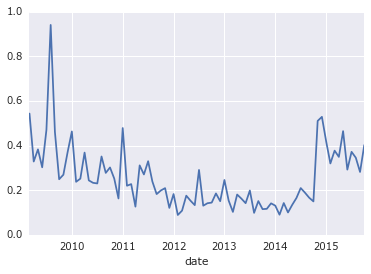

In [321]:
table = pd.DataFrame(data, columns=['date', 'total', 'new'])
table = table.set_index('date')
table['new_share'] = table.new / table.total
table = table.resample('M', how='mean')
table.new_share.plot()

С 2015 90% находится, до этого ~65%.

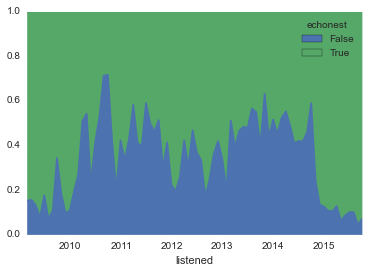

In [251]:
data = [(_.listened, _.audio is not None) for _ in tracks]
table = pd.DataFrame(data, columns=['listened', 'echonest'])
table = table.groupby(['listened', 'echonest']).size()
table = table.unstack()
table = table.resample('M', how='sum')
table = table.div(table.sum(axis=1), axis=0)
table.plot(kind='area')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10b867190>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1158678d0>]], dtype=object)

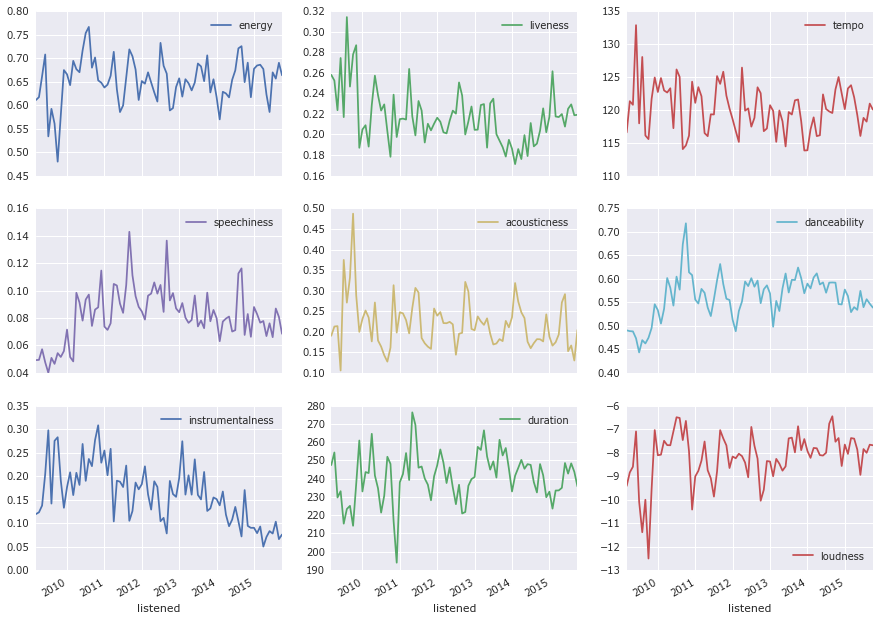

In [8]:
data = [
    (_.listened, _.audio.energy, _.audio.liveness, _.audio.tempo, _.audio.speechiness,
     _.audio.acousticness, _.audio.danceability, _.audio.instrumentalness,
     _.audio.duration, _.audio.loudness)
    for _ in tracks if _.audio    
]
table = pd.DataFrame(
    data,
    columns=[
        'listened', 'energy', 'liveness', 'tempo', 'speechiness',
        'acousticness', 'danceability', 'instrumentalness', 'duration', 'loudness'
    ]
)
table = table.set_index('listened')
table = table.resample('M', how='mean')
table.plot(subplots=True, figsize=(15, 15), layout=(4, -1))